In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data import *
from preprocess import *
from skimage import filters
from random import choice
from scipy import signal
from skimage.color import gray2rgb

(0.078125, 0.078125)

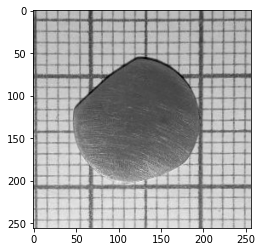

In [497]:
image, fname = next(random_images(names=True))
img = align(rgb2gray(image))
plt.imshow(img, cmap='gray')
pixel_scale_edge(img)

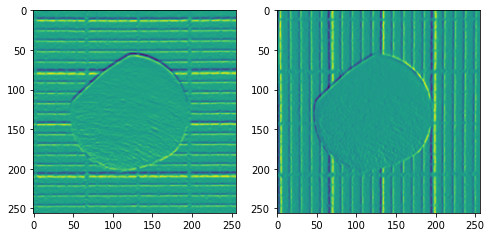

In [498]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

far_h = filters.farid_h(img)
far_h_th = far_h < filters.threshold_li(far_h)

far_v = filters.farid_v(img)
far_v_th = far_v < filters.threshold_li(far_v)

axs[0].imshow(far_h)
axs[1].imshow(far_v)

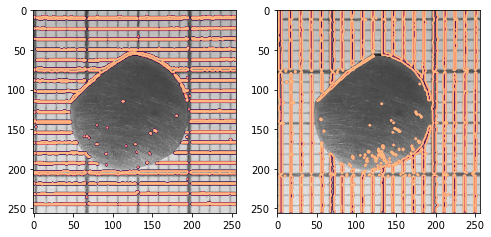

In [499]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(img, cmap='gray')
axs[1].imshow(img, cmap='gray')
axs[0].contour(far_h_th, cmap='magma')
axs[1].contour(far_v_th, cmap='magma')

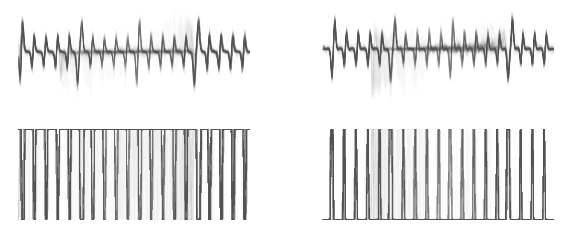

In [500]:
fig, axs = plt.subplots(2, 2, figsize=(10, 4))
for ax in axs.flat: ax.axis('off')

for i in range(256):
    axs[0][0].plot(far_v[i], 'k-', alpha=0.01)
    axs[0][1].plot(far_h.T[i], 'k-', alpha=0.01)
    axs[1][0].plot(far_v_th[i], 'k-', alpha=0.01)
    axs[1][1].plot(far_h_th.T[i], 'k-', alpha=0.01)

plt.show()

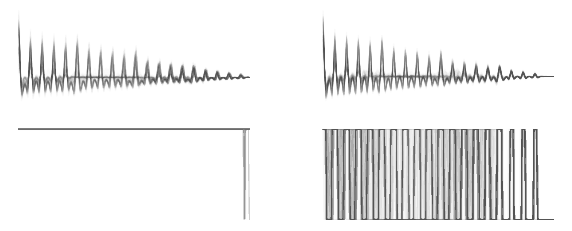

In [501]:
fig, axs = plt.subplots(2, 2, figsize=(10, 4))
for ax in axs.flat: ax.axis('off')

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]

for i in range(256):
    v = far_v[i]
    h = far_h.T[i]
    vt = far_v_th[i]
    ht = far_h_th.T[i]
    axs[0][0].plot(autocorr(v), 'k-', alpha=0.01)
    axs[0][1].plot(autocorr(h), 'k-', alpha=0.01)
    axs[1][0].plot(autocorr(vt), 'k-', alpha=0.01)
    axs[1][1].plot(autocorr(ht), 'k-', alpha=0.01)

plt.show()

ModeResult(mode=array([0.13672]), count=array([174]))


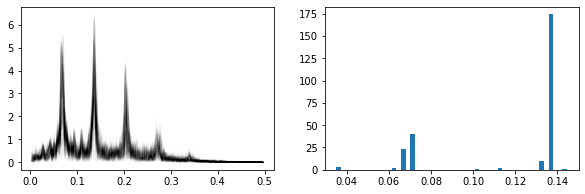

In [493]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

freq = np.fft.fftfreq(256)
freq_filter = freq > 0
freq = freq[freq_filter]
U = []
for u in far_v: 
    fft = np.abs(np.fft.fft(u)[freq_filter])
    U.append(freq[fft == fft.max()][0])
    axs[0].plot(freq, fft, 'k-', alpha=0.01)
    
axs[1].hist(U, bins=50)
print(mode(np.round(U, 5)))
    
plt.show()

0.07812 0.15625
0.07812 0.15234


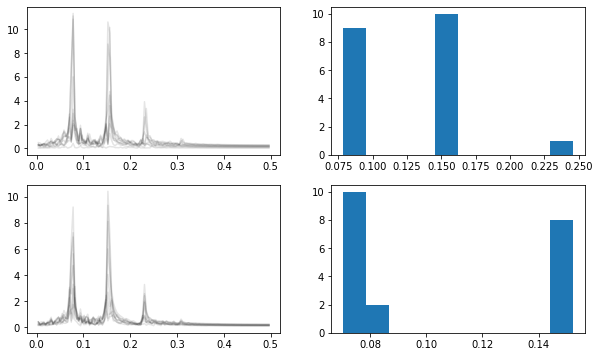

In [539]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

freq = np.fft.fftfreq(256)
freq_filter = freq > 0
freq = freq[freq_filter]

Ux, Uy = [], []
N = 10
for i in np.random.randint(0, 256, N): 
    u = autocorr(far_v[i])
    p = autocorr(far_h.T[i])
    
    #u = far_v[i]
    #p = far_h.T[i]
    
    ufft = np.abs(np.fft.fft(u))
    pfft = np.abs(np.fft.fft(p))
    
    ufft = ufft[freq_filter]
    pfft = pfft[freq_filter]

    Ux.append(list(freq[np.isin(ufft, np.sort(ufft)[-2:])]))
    Uy.append(list(freq[np.isin(pfft, np.sort(pfft)[-2:])]))
    
    axs[0][0].plot(freq, ufft, 'k-', alpha=1/N)
    axs[1][0].plot(freq, pfft, 'k-', alpha=1/N)
    
Ux = np.array(Ux)
axs[0][1].hist(Ux.flat)
ax = mode(np.round(Ux[:, 0], 5))[0][0]
bx = mode(np.round(Ux[:, 1], 5))[0][0]

print(ax, bx)

Uy = np.array(Uy)
axs[1][1].hist(Uy.flat)
ay = mode(np.round(Uy[:, 0], 5))[0][0]
by = mode(np.round(Uy[:, 1], 5))[0][0]

print(ay, by)
    
plt.show()

$$
\frac{u(x)}{dx} = -\alpha\tan(\omega x + \delta)
$$

$$
u(x) = \frac{\alpha}{\omega}\ln|\cos(\omega x + \delta)| + C
$$

In [540]:
alpha = 0.5
C = 1
f = lambda x, omega, delta: np.clip(alpha*np.log(np.abs(np.cos(omega*x + delta))) + C, 0, 0.5*C)

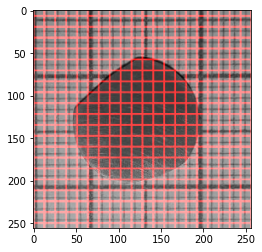

In [541]:
X, Y = np.meshgrid(np.arange(256), np.arange(256))
Gx = norm(f(X, ax*np.pi, np.pi/2))
Gy = norm(f(Y, ay*np.pi, 0))
plt.imshow(np.clip(
    0.8*gray2rgb(img) + 
    [1, 0, 0]*gray2rgb(norm(-Gx)) + 
    [1, 0, 0]*gray2rgb(norm(-Gy)),
0, 1), cmap='gray')
#plt.imshow(img + Gy, cmap='gray')

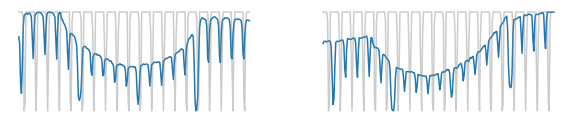

In [542]:
fig, axs = plt.subplots(1, 2, figsize=(10, 2))
for axe in axs.flat: axe.axis('off')

axs[0].plot(norm(np.mean(img, axis=0)))
axs[0].plot(norm(f(np.arange(256), ax*np.pi, 0)), c='gray', alpha=0.4)

axs[1].plot(norm(np.mean(img, axis=1)))
axs[1].plot(norm(f(np.arange(256), ay*np.pi, 0)), c='gray', alpha=0.4)

plt.show()